In [66]:
import matplotlib.pyplot as plt
import numpy as np
import cv2

# Обработка лица на изображении

Будем работать со следующим изображением

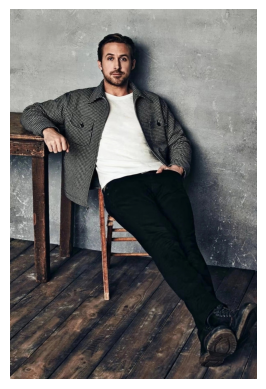

In [67]:
path = 'rayan.jpg'
image = cv2.imread(path)

plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
plt.axis('off')
plt.show()

## Обнаружение лица на фотографии

Загрузим каскад Хаара для распознования лиц

In [68]:
face_cascade = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_frontalface_default.xml')

Преобразуем в серый и выполним распознование

In [69]:
gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
face = face_cascade.detectMultiScale(gray_image, scaleFactor=1.3, minNeighbors=5, minSize=(10, 10))[0]

Нарисуем область распознаного лица

In [70]:
x, y, w, h = face
image_with_face_rectangle = image.copy()
cv2.rectangle(image_with_face_rectangle, (x, y), (x+w, y+h), (255, 255, 0), 2)
pass

Отобразим результат

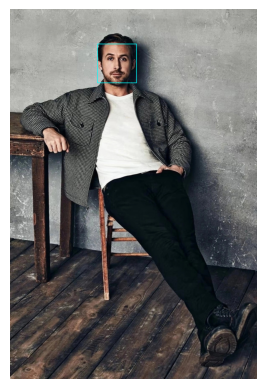

In [71]:
plt.imshow(cv2.cvtColor(image_with_face_rectangle, cv2.COLOR_BGR2RGB))
plt.axis('off')
plt.show()

## Обрезка фрагмента лица

Вычислим границы с отступами по 10% от граница обнаруженного лица

In [72]:
x_start = max(0, x - int(0.1 * w))
y_start = max(0, y - int(0.1 * h))
x_end = min(x + w + int(0.1 * w), image.shape[1])
y_end = min(y + h + int(0.1 * h), image.shape[0])

Обрежем изображение

In [73]:
face_image = image.copy()
face_image = face_image[y_start:y_end, x_start:x_end]

Отобразим результат

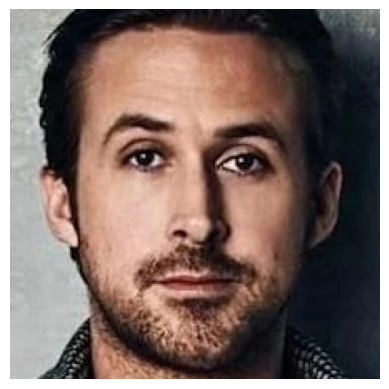

In [74]:
plt.imshow(cv2.cvtColor(face_image, cv2.COLOR_BGR2RGB))
plt.axis('off')
plt.show()

## Выделение границ объектов

Преобразуем в серый

In [75]:
gray_face = cv2.cvtColor(face_image, cv2.COLOR_BGR2GRAY)

Найдём границы объектов методом Canny

In [76]:
face_edges = cv2.Canny(gray_face, 100, 200)

Изобразим результат

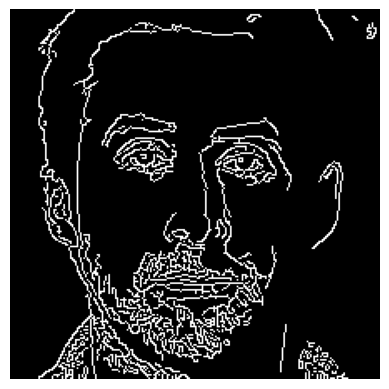

In [77]:
plt.imshow(face_edges, cmap='gray')
plt.axis('off')
plt.show()

## Угловые точки изображения

Найдём угловые точки методом Харриса

In [78]:
face_corners = cv2.cornerHarris(np.float32(gray_face), 2, 3, 0.04)

Соединим с границами

In [79]:
face_corners_and_edges = face_edges.copy()
face_corners_and_edges[face_corners > 0.01 * face_corners.max()] = 255

Изобразим результат

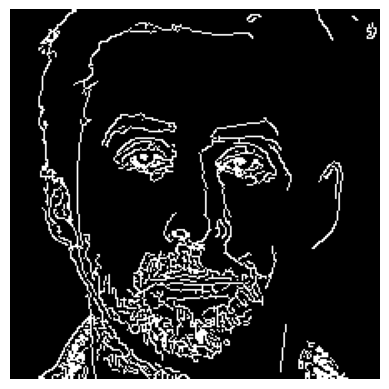

In [80]:
plt.imshow(face_corners_and_edges, cmap='gray')
plt.axis('off')
plt.show()

## Морфологическая операция наращивания

Создадим структурирующий элемент 5х5

In [81]:
kernel = np.ones((5, 5), np.uint8)

Применим наращивание

In [82]:
dilated_face = cv2.dilate(face_corners_and_edges, kernel)

Отобразим результат

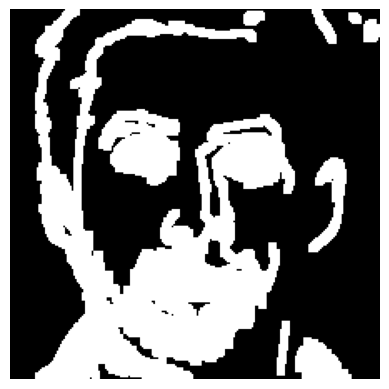

In [83]:
plt.imshow(dilated_face, cmap='gray')
plt.axis('off')
plt.show()

## Сглаживание изображения

Применим гауссовский фильтр 5х5

In [84]:
blurred_face = cv2.GaussianBlur(dilated_face, (5, 5), 0)

Отобразим результат

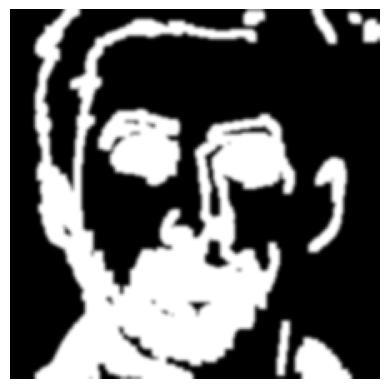

In [85]:
plt.imshow(blurred_face, cmap='gray')
plt.axis('off')
plt.show()

## Нормализация изображения

Нормализуем изображение

In [86]:
norm_face = blurred_face.astype('float32') / 255.0

## Сглаживание изображения лица

Сгладим изображение лица гауссовским фильтром 7х7

In [87]:
blur_face_image = cv2.GaussianBlur(face_image, (7, 7), 0)

Отобразим результат

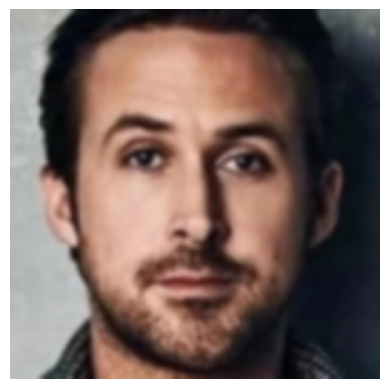

In [88]:
plt.imshow(cv2.cvtColor(blur_face_image, cv2.COLOR_BGR2RGB))
plt.axis('off')
plt.show()

## Преобразование в HSV, увеличение насыщенности, повышение чёткости

Преобразуем в цветовое пространство HSV

In [89]:
hsv_face_image = cv2.cvtColor(face_image, cv2.COLOR_BGR2HSV)

Увеличим насыщенность на 50%

In [90]:
hsv_face_image[:,:,1] = cv2.multiply(hsv_face_image[:,:,1], 1.5)

Повысим чёткость

In [91]:
sharp_filter = np.array([[-1, -1, -1], [-1, 9, -1], [-1, -1, -1]])
hsv_face_image = cv2.filter2D(hsv_face_image, ddepth=-1, kernel=sharp_filter)

Изобразим результат

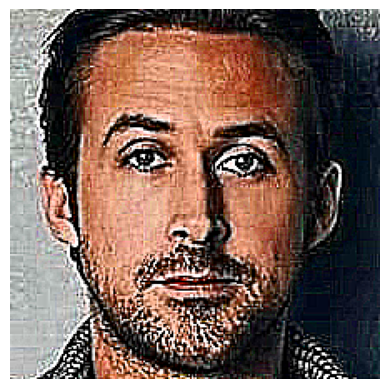

In [92]:
plt.imshow(cv2.cvtColor(hsv_face_image, cv2.COLOR_HSV2RGB))
plt.axis('off')
plt.show()

## Финальная фильтрация

Осуществим финальную фильтрацию по определённой формуле

In [93]:
# M = norm_face.astype('uint8')
M = norm_face

In [94]:
F1 = cv2.cvtColor(blur_face_image, cv2.COLOR_BGR2RGB)

In [95]:
F2 = cv2.cvtColor(hsv_face_image, cv2.COLOR_HSV2RGB)

In [96]:
result = np.empty(face_image.shape, dtype=np.uint8)
for y in range(result.shape[0]):
    for x in range(result.shape[1]):
        for c in range(result.shape[2]):
            result[y, x, c] = M[y, x] * F2[y, x, c] + (1 - M[y, x]) * F1[y, x, c]

Отобразим результат

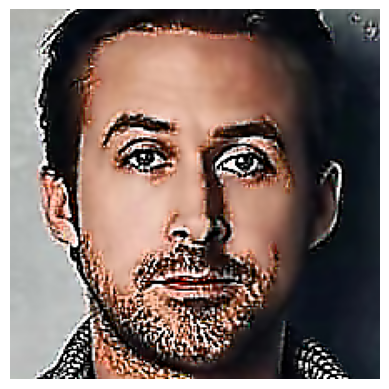

In [97]:
plt.imshow(result)
plt.axis('off')
plt.show()